# Practice 1

Student 1: <font color="blue">Alejandro González Álvarez</font>

NIA 1: <font color="blue">252658</font>

Student 2: <font color="blue">Luca Franceschi</font>

NIA 2: <font color="blue">253885</font>

Student 3: <font color="blue">Júlia Othats-Dalès</font>

NIA 3: <font color="blue">254435</font>

# Imports

In [64]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import torch.nn as nn
import pandas as pd
import numpy as np
import torch

# Useful Hyperparameters

In [65]:
hyp_lr = 0.1
hyp_epochs = 20000

# Ex. 1

In [66]:
'''
Steps :
  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes
  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation
  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples
  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.
  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in training and testing dataset.
'''

'\nSteps :\n  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes\n  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation\n  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples\n  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.\n  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in training and testing dataset.\n'

## Sol. 1

Training dataset:

   Unnamed: 0         X         Y  C
0           0 -0.263997  1.006942  0
1           1  1.678440 -0.215066  1
2           2 -1.581623 -0.003148  0
3           3 -0.863377  0.751651  0
4           4  0.998721 -0.770067  1
Testing dataset:

   Unnamed: 0         X         Y  C
0           0  1.937660  0.624911  1
1           1 -1.004030 -0.097319  0
2           2  1.542199 -0.114397  0
3           3  0.625708 -0.685214  1
4           4  0.247116 -0.348297  1
Not normalized:



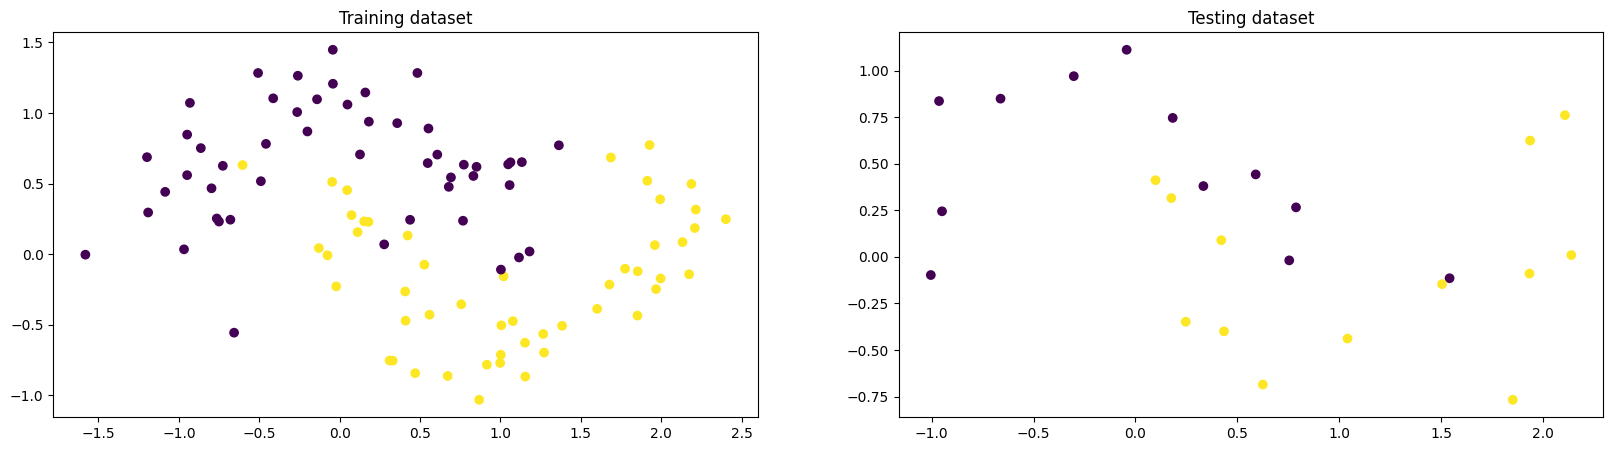


Normalized:



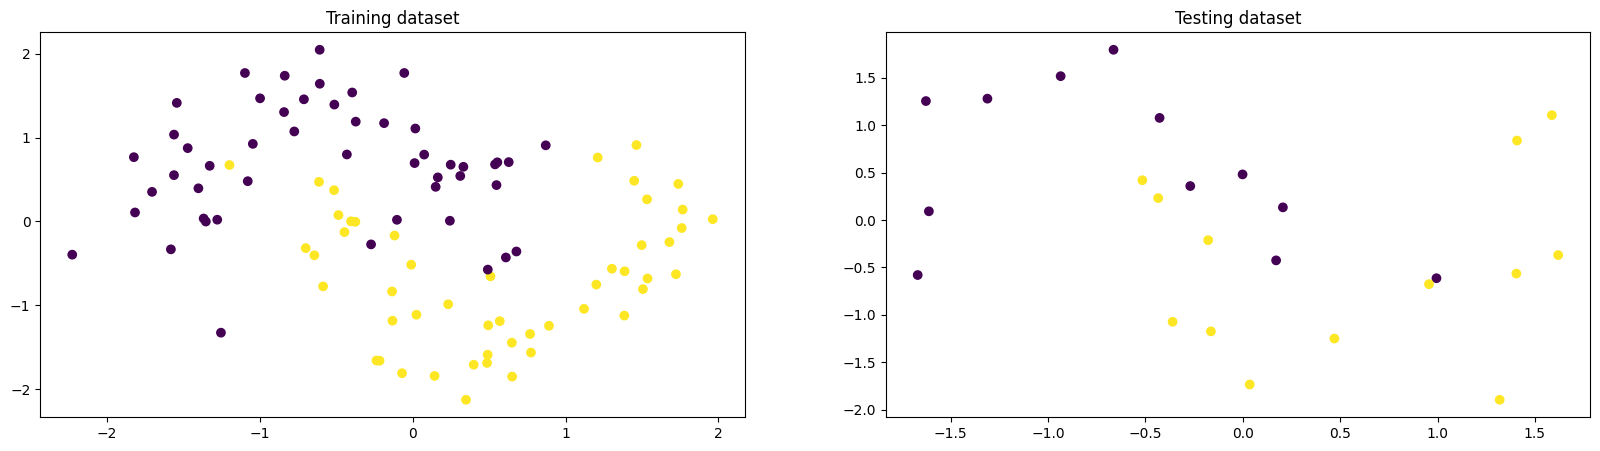

In [67]:
#1. Load train.csv and test.csv
train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')

# Show 5 first elements of the datasets
print("Training dataset:\n")
print(train_df.head(5))
print("Testing dataset:\n")
print(test_df.head(5))

#2. Visualize both training and testing data
print("Not normalized:\n")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].scatter(train_df.X, train_df.Y, c = train_df.C)
axes[0].set_title("Training dataset")
axes[1].scatter(test_df.X, test_df.Y, c = test_df.C)
axes[1].set_title("Testing dataset")
plt.show()

# Normalize data (probar np column stack)
train_x = np.array(train_df[["X"]])
train_y = np.array(train_df[["Y"]].values)
test_x = np.array(test_df[["X"]].values)
test_y = np.array(test_df[["Y"]].values)

train_data = np.column_stack((train_x, train_y))
test_data = np.column_stack((test_x, test_y))

normalized_train = (train_data - np.mean(train_data, axis=0)) / np.std(train_data, axis=0)
normalized_test = (test_data - np.mean(test_data, axis=0)) / np.std(test_data, axis=0)

# normalized_train = (train_df[["X", "Y"]] - np.mean(train_df[["X", "Y"]], axis = 0)) / np.std(train_df[["X", "Y"]], axis = 0)
# normalized_test = (test_df[["X", "Y"]] - np.mean(test_df[["X", "Y"]], axis = 0)) / np.std(test_df[["X", "Y"]], axis = 0)

print("\nNormalized:\n")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].scatter(normalized_train[:,0], normalized_train[:,1], c = train_df.C)
axes[0].set_title("Training dataset")
axes[1].scatter(normalized_test[:,0], normalized_test[:,1], c = test_df.C)
axes[1].set_title("Testing dataset")
plt.show()

In [68]:
#3. Implementation of the MLP Class:
class MLP(object):
    def __init__(self,inputNode=2, hiddenNode=3, outputNode=1):
        #Define MLP hyper-parameters
        self.inputLayerSize = inputNode # number of input dimensions (x)
        self.outputLayerSize = outputNode # number of output dimensions (y)
        self.hiddenLayerSize = hiddenNode # Dimension of intermediate layer (W_2)

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)

    def forward(self, X):
        #Compute inputs from outputs
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    # Derivative of sigmoid and loss with respect their inputs
    def sigmoidPrime(self, z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)    # sigmoid(z) * (1 - sigmoid(z))

    def loss(self, yHat, y):
        #Compute loss for given X, y, use weights already stored in class.
        J = np.mean(-y * np.log(yHat) - (1-y)*np.log(1-yHat))
        return J

    # Derivative of parameters
    def backward(self, X, yHat, y):
        self.yHat = yHat
        delta3 = (yHat - y)     # dL / dz3
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        return dJdW1,dJdW2
    
# Function to train a neural network (NN)
def train(NN:MLP, X, y, epoch = 10000, lr = .1):
    list_loss = []

    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)

        gradW1,gradW2 = NN.backward(X, yHat, y)
        #now update the weight using gradient descent
        NN.W1 -= gradW1 * lr
        NN.W2 -= gradW2 * lr

        if i%10 == 0 :
            loss = NN.loss(yHat, y)
            if i%100 == 0:
                print('Loss {}={}'.format(i, loss))
            list_loss.append(loss)

    return list_loss

In [69]:
def predict(NN, X):
    return np.round(NN.forward(X))

def accuracy(y, yHat):
    error = 0
    for c1, c2 in zip(y, yHat):
        if c1 != c2:
            error += 1
    return 1 - (error/len(y))

Loss 0=0.6279442979373075
Loss 100=0.3403994926976018
Loss 200=0.3404910862858063
Loss 300=0.3401763852507846
Loss 400=0.3400655920696671
Loss 500=0.34002583548544313
Loss 600=0.3400104279552775
Loss 700=0.34000416200722
Loss 800=0.3400015481953711
Loss 900=0.3400004451863542
Loss 1000=0.3399999774852855
Loss 1100=0.3399997787954325
Loss 1200=0.33999969432760474
Loss 1300=0.33999965840900326
Loss 1400=0.33999964313378983
Loss 1500=0.33999963663744914
Loss 1600=0.3399996338746153
Loss 1700=0.3399996326996038
Loss 1800=0.3399996321998801
Loss 1900=0.3399996319873512
Loss 2000=0.33999963189696436
Loss 2100=0.3399996318585234
Loss 2200=0.33999963184217485
Loss 2300=0.33999963183522186
Loss 2400=0.33999963183226484
Loss 2500=0.33999963183100723
Loss 2600=0.3399996318304723
Loss 2700=0.3399996318302449
Loss 2800=0.3399996318301481
Loss 2900=0.3399996318301069
Loss 3000=0.33999963183008935
Loss 3100=0.339999631830082
Loss 3200=0.3399996318300789
Loss 3300=0.3399996318300774
Loss 3400=0.339999

Text(0, 0.5, 'Loss (J) value')

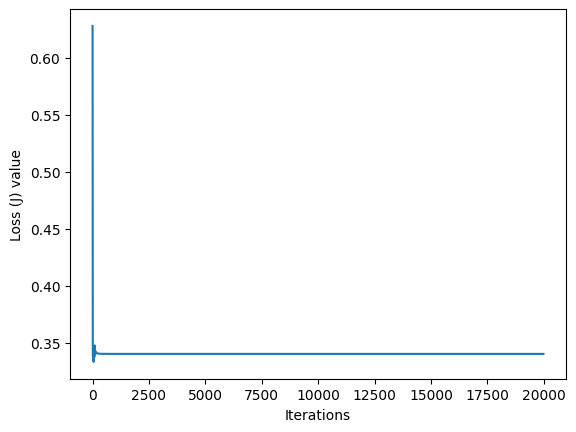

In [70]:
# Instantiate an MLP NN
mlp = MLP()

#4. Train the MLP, visualize decision boundary in 2D, and plot loss at each iteration
list_loss = train(mlp, train_df[["X", "Y"]], np.array([train_df.C]).reshape(100, 1), epoch=hyp_epochs, lr = hyp_lr)

# arange used for better visualization of iterations
plt.plot(10 * np.arange(len(list_loss)), list_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss (J) value')

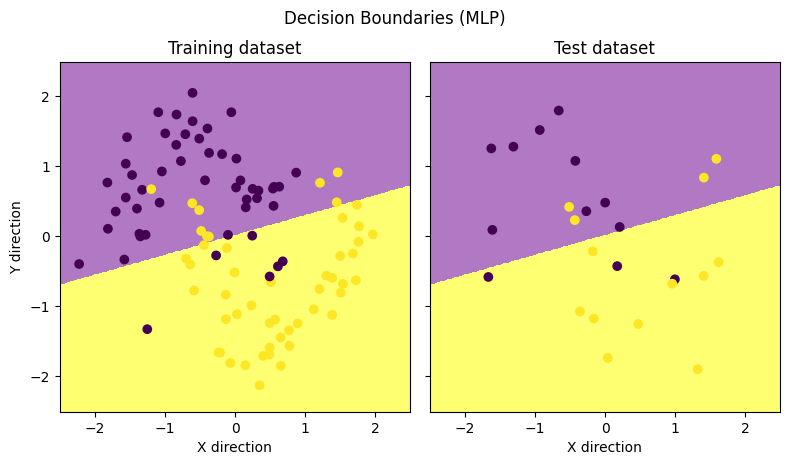

In [71]:
# Visualize the decision boundary in 2D of the classification
def visualize_boundaries(NN, range_x, range_y,
                         norm_train=None, norm_test=None, labels_train=None, labels_test=None,
                         cmap=ListedColormap(['#7E1E9C99', '#FFFF1499']),
                         title='MLP'):
    
    xx, yy = np.meshgrid(np.arange(range_x[0], range_x[1], 0.01), np.arange(range_y[0], range_y[1], 0.01))
    input = np.column_stack((xx.flatten(), yy.flatten()))

    pred = predict(NN, input)
    pred = pred.reshape(xx.shape)

    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8,4.5))

    ax[0].set_box_aspect(1)
    ax[1].set_box_aspect(1)

    fig.suptitle('Decision Boundaries ({})'.format(title))
    ax[0].set_title('Training dataset')
    ax[1].set_title('Test dataset')
    ax[0].set_ylabel('Y direction')
    ax[0].set_xlabel('X direction')
    ax[1].set_xlabel('X direction')

    ax[0].pcolormesh(xx, yy, pred, cmap=cmap)
    ax[1].pcolormesh(xx, yy, pred, cmap=cmap)

    if norm_train.all() != None and norm_test.all() != None and labels_train.all() != None and labels_test.all() != None:
        ax[0].scatter(norm_train[:,0], norm_train[:,1], c=labels_train)
        ax[1].scatter(norm_test[:,0], norm_test[:,1], c=labels_test)

    plt.tight_layout()
    plt.show()
    # plt.contour([normalized_test[:, 0], normalized_test[:, 1]], )

visualize_boundaries(mlp, (-2.5, 2.5), (-2.5, 2.5), normalized_train, normalized_test, train_df.C, test_df.C,)

In [72]:
# 5. Apply on test dataset, and accuracy
test_yHat = predict(mlp, normalized_test)
train_yHat = predict(mlp, normalized_train)

train_accuracy = accuracy(train_df.C, train_yHat)
test_accuracy = accuracy(test_df.C, test_yHat)

print("Accuracy obtained in training dataset: %.2f" % (train_accuracy * 100) + " %.")
print("Accuracy obtained in test dataset: %.2f" % (test_accuracy * 100) + " %.")

Accuracy obtained in training dataset: 85.00 %.
Accuracy obtained in test dataset: 72.00 %.


# Ex. 2

In [73]:
'''
Instead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum.
This optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.
Steps :
  1. Try to understand how momentum is implemented reading carefully https://www.ruder.io/optimizing-gradient-descent/#momentum
  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom.
  3. Train the MLP implmented in numpy with this new optimizer.
  4. Use different values for the momentum paramter [0,1] and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.
'''


'\nInstead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum.\nThis optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.\nSteps :\n  1. Try to understand how momentum is implemented reading carefully https://www.ruder.io/optimizing-gradient-descent/#momentum\n  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom.\n  3. Train the MLP implmented in numpy with this new optimizer.\n  4. Use different values for the momentum paramter [0,1] and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.\n'

## Sol. 2

In [74]:
class OptimMom(object):
    def __init__(self,learning_rate = .001, gamma = 0.9):
        self.lr = learning_rate
        self.gamma = gamma
        self.last = 0
    # receive the parameters of the MLP and the computed gradients and update the latter
    def step(self,weight_list,gradient):
        uw = []
        for w,grd in zip(weight_list,gradient):
            VdW = (1-self.gamma)*self.last + self.gamma*grd
            uw.append(w - self.lr * VdW)
        return uw

In [75]:
# Same training procedure than befor but using the optimizer class
def train_woptimizer(NN,X, y, epoch = 5000, optim = None):
    list_loss = []

    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)

        gradW1,gradW2 = NN.backward(X,yHat,y)
        '''#now update the weight using gradient descent and the optimizer class
        NN.W1 -= gradW1 * lr
        NN.W2 -= gradW2 * lr'''
        NN.W1, NN.W2 = optim.step([NN.W1,NN.W2],[gradW1,gradW2])

        if i%10 == 0 :
            loss = NN.loss(yHat, y)
            if i%100 == 0:
                print('Loss {}={}'.format(i, loss))
            list_loss.append(loss)

    return list_loss

Loss 0=0.7484203376423606
Loss 100=0.33126810915705784
Loss 200=0.3402647702061058
Loss 300=0.3399559299626977
Loss 400=0.3398102124556104
Loss 500=0.3397428923272392


Loss 600=0.33970993485531537
Loss 700=0.3396930321383034
Loss 800=0.33968414464749963
Loss 900=0.3396794183429527
Loss 1000=0.3396768931923897
Loss 1100=0.3396755416439126
Loss 1200=0.3396748177720656
Loss 1300=0.33967442998589575
Loss 1400=0.3396742222283378
Loss 1500=0.33967411091886596
Loss 1600=0.33967405128258954
Loss 1700=0.33967401933120817
Loss 1800=0.3396740022125859
Loss 1900=0.3396739930409271
Loss 2000=0.33967398812702043
Loss 2100=0.3396739854942933
Loss 2200=0.33967398408375565
Loss 2300=0.3396739833280308
Loss 2400=0.3396739829231358
Loss 2500=0.33967398270620486
Loss 2600=0.33967398258997966
Loss 2700=0.33967398252770964
Loss 2800=0.3396739824943472
Loss 2900=0.3396739824764726
Loss 3000=0.3396739824668959
Loss 3100=0.33967398246176495
Loss 3200=0.339673982459016
Loss 3300=0.33967398245754316
Loss 3400=0.3396739824567541
Loss 3500=0.3396739824563313
Loss 3600=0.33967398245610475
Loss 3700=0.3396739824559834
Loss 3800=0.33967398245591846
Loss 3900=0.3396739824558837
Loss

Text(0, 0.5, 'Loss (J) value')

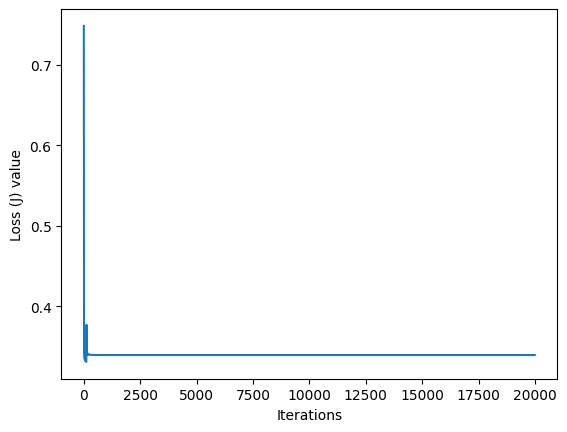

In [76]:
optim = OptimMom(learning_rate=hyp_lr, gamma=0.9)
mlpMom = MLP()

list_loss = train_woptimizer(mlpMom, train_df[["X", "Y"]], np.array([train_df.C]).reshape(100, 1), epoch=hyp_epochs, optim=optim)

# arange used for better visualization of iterations
plt.plot(10 * np.arange(len(list_loss)), list_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss (J) value')

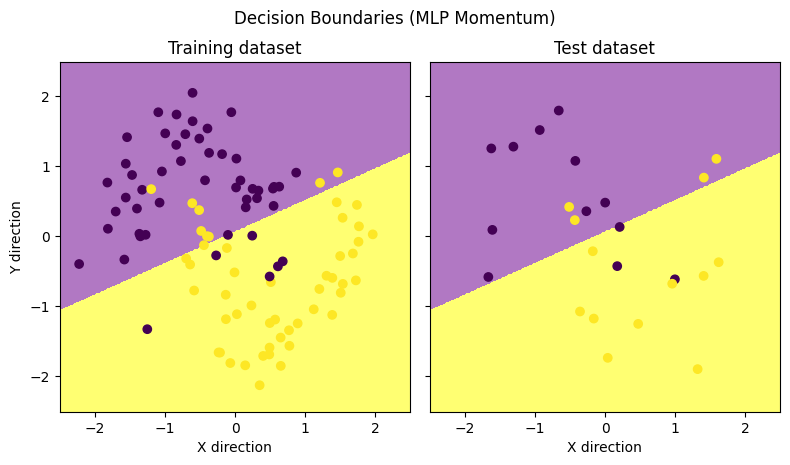

In [77]:
visualize_boundaries(mlpMom, (-2.5, 2.5), (-2.5, 2.5), normalized_train, normalized_test, train_df.C, test_df.C, title='MLP Momentum')

# Ex. 3

In [78]:
'''
Steps :
  1. Do the same as Ex. 1 but implementing the MLP using PyTorch.
  2. Train different vesions of the MLP by varying the number of hidden neurons and learing rates
  3. Analyse the results in each case and discuss them.

HINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in PyTorch you have to use in this case.
'''

'\nSteps :\n  1. Do the same as Ex. 1 but implementing the MLP using PyTorch.\n  2. Train different vesions of the MLP by varying the number of hidden neurons and learing rates\n  3. Analyse the results in each case and discuss them.\n\nHINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in PyTorch you have to use in this case.\n'

## Sol. 3

In [79]:
# Print if gpu acceleration is enabled
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [80]:
class MLP_PyTorch(nn.Module):
    def __init__(self, inputNode=2, hiddenNode=3, outputNode=1):
        super(MLP_PyTorch, self).__init__()
        # Define Hyperparameters
        self.inputLayerSize = inputNode
        self.outputLayerSize = outputNode
        self.hiddenLayerSize = hiddenNode

        self.Linear1 = nn.Linear(self.inputLayerSize, self.hiddenLayerSize)
        self.Linear2 = nn.Linear(self.hiddenLayerSize, self.outputLayerSize)

        nn.init.normal_(self.Linear1.weight, mean=0, std=0.1)
        nn.init.normal_(self.Linear2.weight, mean=0, std=0.1)

        self.sigmoid = nn.Sigmoid() # Module implementing the sigmoid funciton
        self.loss = nn.BCELoss() # Not MSE as in the expample

    def forward(self, X):
        out = self.Linear1(X) # First Linear Layer
        out = self.sigmoid(out) # activation function
        out = self.Linear2(out) # Second Linear Layer
        y_hat = self.sigmoid(out) # final activation function
        return y_hat

def train_PyTorch(NN, X, y, epoch=10000, optimizer=None):
    NN.train()
    list_loss = []

    X.to(device)
    y.to(device)

    for i in range(epoch):
        # reset optimizer at each epoch
        optimizer.zero_grad()

        # Process the dataset with the forward pass
        yHat = NN.forward(X)

        # and compute the loss function
        loss_val = NN.loss(yHat, y)

        # Automatically compute the gradients
        loss_val.backward()
        
        # Call the optimizer to update the paramters
        optimizer.step()

        # Print loss and save the value at each iteration
        if i%500 == 0:
            print('Loss {}={}'.format(i,loss_val))
        list_loss.append(loss_val.item())
        
    print('Loss {}={}'.format(i,loss_val))
    return list_loss

Loss 0=0.7006149888038635
Loss 500=0.42125141620635986
Loss 1000=0.3418676257133484
Loss 1500=0.3379214107990265
Loss 2000=0.3364708721637726
Loss 2500=0.3352866768836975
Loss 3000=0.3342140316963196
Loss 3500=0.33319592475891113
Loss 4000=0.33218851685523987
Loss 4500=0.3311600089073181
Loss 5000=0.33009323477745056
Loss 5500=0.3289860785007477
Loss 6000=0.32784703373908997
Loss 6500=0.3266882002353668
Loss 7000=0.32551851868629456
Loss 7500=0.324341356754303
Loss 8000=0.32315489649772644
Loss 8500=0.3219545781612396
Loss 9000=0.3207350969314575
Loss 9500=0.31949102878570557
Loss 10000=0.31821656227111816
Loss 10500=0.3169047236442566
Loss 11000=0.31554585695266724
Loss 11500=0.3141269087791443
Loss 12000=0.31263238191604614
Loss 12500=0.31104665994644165
Loss 13000=0.3093591034412384
Loss 13500=0.30756792426109314
Loss 14000=0.30568137764930725
Loss 14500=0.3037140965461731
Loss 15000=0.30168065428733826
Loss 15500=0.29958727955818176
Loss 16000=0.29742175340652466
Loss 16500=0.29513

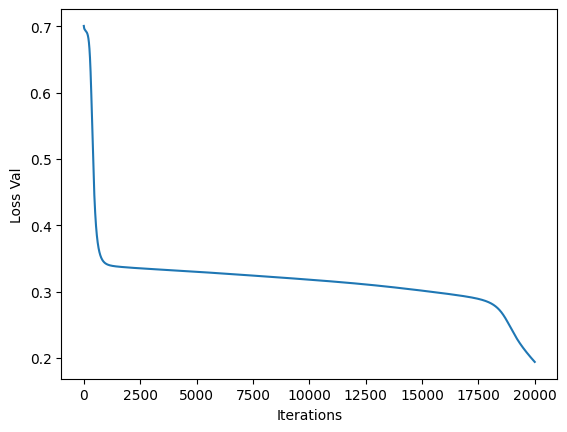

In [81]:
MLP_PT = MLP_PyTorch()
optimizer = torch.optim.SGD(MLP_PT.parameters(), lr=hyp_lr)
list_loss = train_PyTorch(MLP_PT, torch.FloatTensor(normalized_train), torch.FloatTensor(train_df.C).unsqueeze(1), epoch=hyp_epochs, optimizer=optimizer)

plt.plot(list_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss Val')
plt.show()

In [82]:
def predict_PyTorch(NN, X):
    NN.eval()
    return torch.round(NN.forward(torch.Tensor(X)))

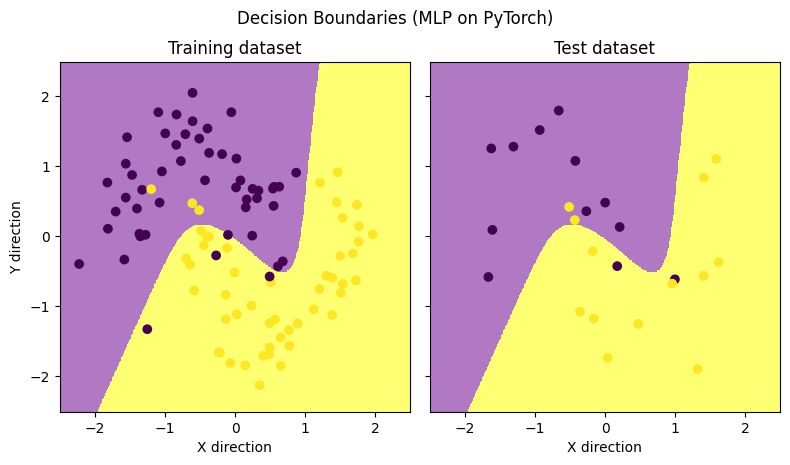

In [83]:
# Visualize the decision boundary in 2D of the classification
def visualize_boundaries_PyTorch(NN, range_x, range_y,
                         norm_train, norm_test, labels_train, labels_test,
                         cmap=ListedColormap(['#7E1E9C99', '#FFFF1499']),
                         title='MLP'):
    
    xx, yy = np.meshgrid(np.arange(range_x[0], range_x[1], 0.01), np.arange(range_y[0], range_y[1], 0.01))
    input = np.column_stack((xx.flatten(), yy.flatten()))

    pred = predict_PyTorch(NN, torch.Tensor(input)).detach().numpy()
    pred = pred.reshape(xx.shape)

    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8,4.5))

    ax[0].set_box_aspect(1)
    ax[1].set_box_aspect(1)

    fig.suptitle('Decision Boundaries ({})'.format(title))
    ax[0].set_title('Training dataset')
    ax[1].set_title('Test dataset')
    ax[0].set_ylabel('Y direction')
    ax[0].set_xlabel('X direction')
    ax[1].set_xlabel('X direction')

    ax[0].pcolormesh(xx, yy, pred, cmap=cmap)
    ax[1].pcolormesh(xx, yy, pred, cmap=cmap)

    ax[0].scatter(norm_train[:,0], norm_train[:,1], c=labels_train)
    ax[1].scatter(norm_test[:,0], norm_test[:,1], c=labels_test)

    plt.tight_layout()
    plt.show()
    # plt.contour([normalized_test[:, 0], normalized_test[:, 1]], )

visualize_boundaries_PyTorch(MLP_PT, (-2.5, 2.5), (-2.5, 2.5), normalized_train, normalized_test, train_df.C, test_df.C, title='MLP on PyTorch')

In [84]:
test_yHat = predict_PyTorch(MLP_PT, normalized_test)
train_yHat = predict_PyTorch(MLP_PT, normalized_train)

train_accuracy = accuracy(train_df.C, train_yHat)
test_accuracy = accuracy(test_df.C, test_yHat)

print("Accuracy obtained in training dataset: %.2f" % (train_accuracy * 100) + " %.")
print("Accuracy obtained in test dataset: %.2f" % (test_accuracy * 100) + " %.")

Accuracy obtained in training dataset: 93.00 %.
Accuracy obtained in test dataset: 84.00 %.
